In [1]:
# packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Basketball court drawing
# https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d

def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc:
    ax.add_artist(matplotlib.patches.Arc((0, 140), 440, 315, theta1=0,
                                  theta2=180, facecolor='none', edgecolor=color, lw=2))

    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(matplotlib.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(matplotlib.patches.Circle((0, 60), 15, facecolor='none', edgecolor='red', lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color='red')

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    return ax

In [3]:
df = pd.read_csv('dataset.csv')
df.describe()

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.000000,2987.0,2987.000000
mean,2.418480,5.317041,28.879813,12.461332,0.688651,85.212923,1.0,0.494811
std,1.119291,3.411044,17.360484,8.992709,103.898403,82.479396,0.0,0.500057
min,1.000000,0.000000,0.000000,0.000000,-244.000000,-44.000000,1.0,0.000000
25%,1.000000,2.000000,14.000000,2.000000,-77.000000,11.000000,1.0,0.000000
50%,2.000000,5.000000,29.000000,14.000000,0.000000,62.000000,1.0,0.000000
75%,3.000000,8.000000,44.000000,19.000000,85.500000,147.000000,1.0,1.000000
max,5.000000,12.000000,59.000000,44.000000,245.000000,389.000000,1.0,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PLAYER_NAME          2987 non-null   object
 1   PERIOD               2987 non-null   int64 
 2   MINUTES_REMAINING    2987 non-null   int64 
 3   SECONDS_REMAINING    2987 non-null   int64 
 4   ACTION_TYPE          2987 non-null   object
 5   SHOT_TYPE            2987 non-null   object
 6   SHOT_ZONE_BASIC      2987 non-null   object
 7   SHOT_ZONE_AREA       2987 non-null   object
 8   SHOT_ZONE_RANGE      2987 non-null   object
 9   SHOT_DISTANCE        2987 non-null   int64 
 10  LOC_X                2987 non-null   int64 
 11  LOC_Y                2987 non-null   int64 
 12  SHOT_ATTEMPTED_FLAG  2987 non-null   int64 
 13  SHOT_MADE_FLAG       2987 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 326.8+ KB


In [5]:
# going to split the data frames up by player instead of having them combined

mj_df = df[df['PLAYER_NAME']=='Michael Jordan']
lbj_df = df[df['PLAYER_NAME']=='LeBron James']
mj_df.describe()

,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.0,1892.000000
mean,2.340381,5.337209,28.852008,12.822410,5.719873,78.837738,1.0,0.486258
std,1.100165,3.483652,17.202139,7.698315,111.091093,71.327287,0.0,0.499943
min,1.000000,0.000000,0.000000,0.000000,-235.000000,-44.000000,1.0,0.000000
25%,1.000000,2.000000,14.000000,9.000000,-96.000000,6.000000,1.0,0.000000
50%,2.000000,5.000000,29.000000,14.000000,0.000000,67.000000,1.0,0.000000
75%,3.000000,8.000000,43.000000,18.000000,107.000000,134.000000,1.0,1.000000
max,5.000000,12.000000,59.000000,44.000000,233.000000,389.000000,1.0,1.000000


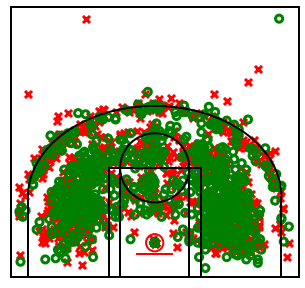

In [6]:
 # Michael Jordan
 # General plot parameters
matplotlib.rcParams['font.family'] = 'Avenir'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['axes.linewidth'] = 2

# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = mj_df[mj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = mj_df[mj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()

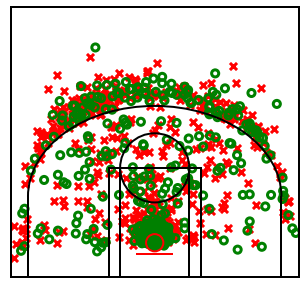

In [7]:
# LeBron James
# Draw basketball court
fig = plt.figure(figsize=(4,3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

x_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_X']
y_missed = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 0]['LOC_Y'] + 60

x_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_X']
y_made = lbj_df[lbj_df['SHOT_MADE_FLAG'] == 1]['LOC_Y'] + 60

ax.scatter(x_missed, y_missed, c='r', marker='x', s = 50, linewidths=3)
ax.scatter(x_made, y_made, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

# plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
# Function to create zone specific shot charts

def create_zone_chart(data_frame, shot_type, shot_zone_area, player):
    fig = plt.figure(figsize=(4,3.76))
    ax = fig.add_axes([0, 0, 1, 1])
    ax = create_court(ax, 'black')

    points = 0
    if shot_type == '2PT Field Goal':
        points = 2
    else:
        points = 3

    x_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_X']
    y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &
                             (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_Y'] + 60

    x_made_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 1) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_X']
    y_made_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 1) & (data_frame['SHOT_ZONE_AREA'] == shot_zone_area) &
                           (data_frame['SHOT_TYPE'] == shot_type) & (data_frame['PLAYER_NAME'] == player)]['LOC_Y'] + 60

    shooting_percentage = len(x_made_center)/len((x_made_center+x_missed_center))
    shots_made = len(x_made_center)
    shots_attempted = len((x_made_center+x_missed_center))
    points_per_shot_attempt = (len(x_made_center)*points)/len((x_made_center+x_missed_center))

    ax.scatter(x_missed_center, y_missed_center, c='r', marker='x', s = 50, linewidths=3)
    ax.scatter(x_made_center, y_made_center, facecolors='none', edgecolors='g', marker='o', s = 50, linewidths=3)

    ax.text(0,1.05,player + ': '+ shot_zone_area + ' '+ shot_type +'s' + '\n'+ str('{:.2%}'.format(shooting_percentage)) +
            ' on '+ str(shots_made) + ' out of '+ str(shots_attempted) + ' shooting\n' +
            'Points Per Shot Attempt: '+ str('{:.2}'.format(points_per_shot_attempt)) ,
            transform = ax.transAxes, ha='left', va='baseline')
    # print(shooting_percentage, shots_made, shots_attempted, points_per_shot_attempt)
    plt.savefig('.\plots\\'+player+shot_zone_area+shot_type+str(max(data_frame['SHOT_DISTANCE']))+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    return shooting_percentage, shots_made, shots_attempted, points_per_shot_attempt

In [9]:
# Creating a dataframe to house all the shot chart stats
stats_df = pd.DataFrame(columns=['PLAYER_NAME', 'SHOT_TYPE', 'SHOT_ZONE_AREA', 'SHOOTING_PERCENTAGE', 'SHOTS_MADE', 'SHOTS_ATTEMPTED', 'POINTS_PER_SHOT_ATTEMPT'])

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


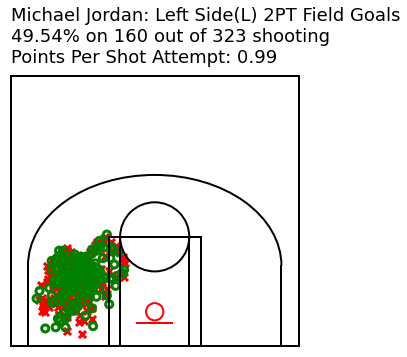

In [10]:
# Michael Jordan - Left Side 2 Pointers
player = 'Michael Jordan'
shot_type = '2PT Field Goal'
shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

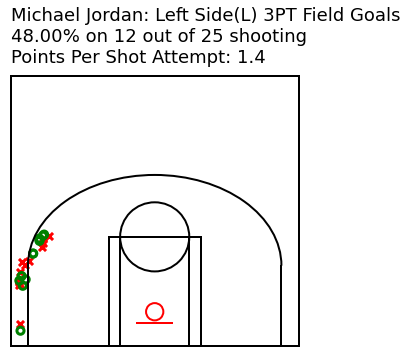

In [11]:
# Michael Jordan - Left Side 3 Pointers
player = 'Michael Jordan'
shot_type = '3PT Field Goal'
shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

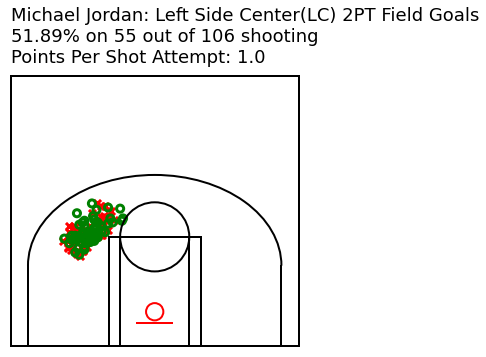

In [12]:
# Michael Jordan - Left Side Center 2 Pointers

player = 'Michael Jordan'
shot_type = '2PT Field Goal'
shot_zone_area = 'Left Side Center(LC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()


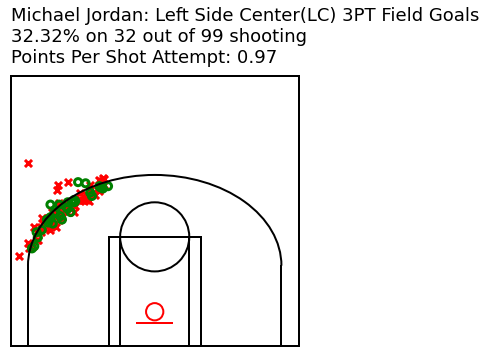

In [13]:
# Michael Jordan - Left Side Center 3 Pointers
# player = 'Michael Jordan'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side Center(LC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

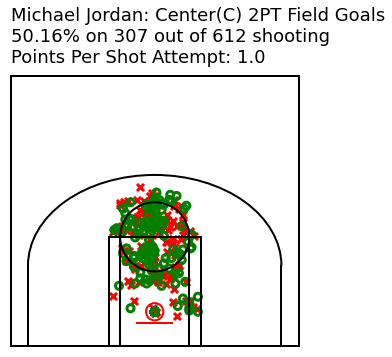

In [14]:
# Michael Jordan - Center 2 Pointers
# player = 'Michael Jordan'
shot_type = '2PT Field Goal'
shot_zone_area = 'Center(C)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

# stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

C:\Users\ramse\AppData\Local\Temp/ipykernel_19400/2996117947.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &


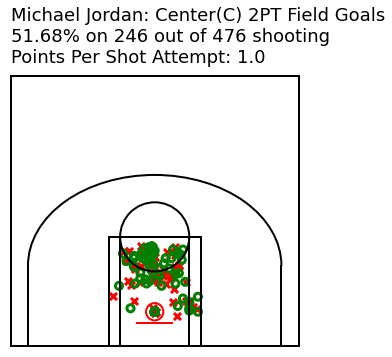

In [15]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
mj_center_eleven_and_less = df[(df['PLAYER_NAME']=='Michael Jordan') & (df['SHOT_DISTANCE'] <= 11)]

# player = 'Michael Jordan'
# shot_type = '2PT Field Goal'
# shot_zone_area = 'Center(C)'

sp, sm, sa, ppa = create_zone_chart(mj_center_eleven_and_less, shot_type, shot_zone_area, player)

the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

C:\Users\ramse\AppData\Local\Temp/ipykernel_19400/2996117947.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &


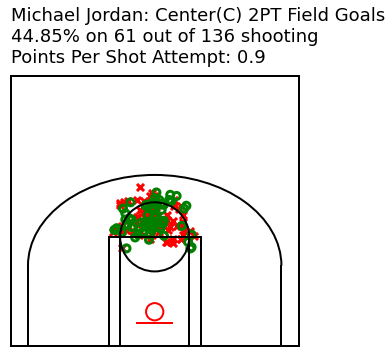

In [16]:
mj_center_twelve_up = df[(df['PLAYER_NAME']=='Michael Jordan') & (df['SHOT_DISTANCE'] > 11)]
sp, sm, sa, ppa = create_zone_chart(mj_center_twelve_up, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

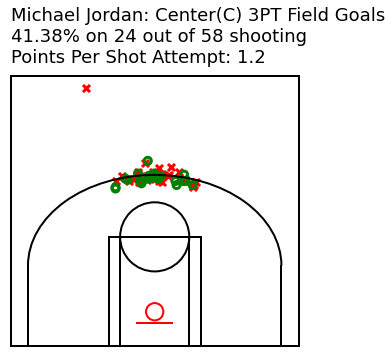

In [17]:
# Michael Jordan - Center 3 Pointers
# player = 'Michael Jordan'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side Center(LC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

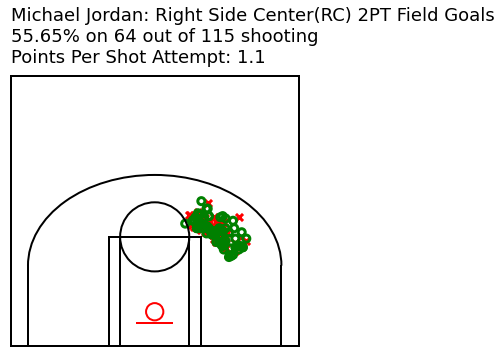

In [18]:
# Michael Jordan - Right Side Center 2 Pointers
# player = 'Michael Jordan'
shot_type = '2PT Field Goal'
shot_zone_area = 'Right Side Center(RC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

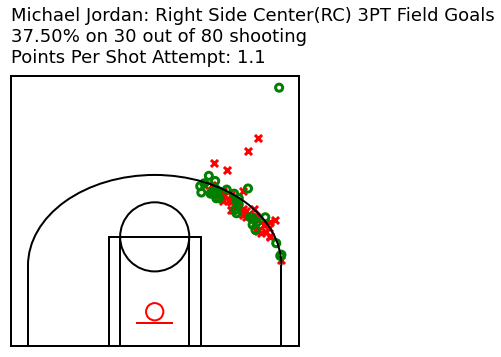

In [19]:
# Michael Jordan - Right Side Center 3 Pointers
# player = 'Michael Jordan'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Right Side Center(RC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

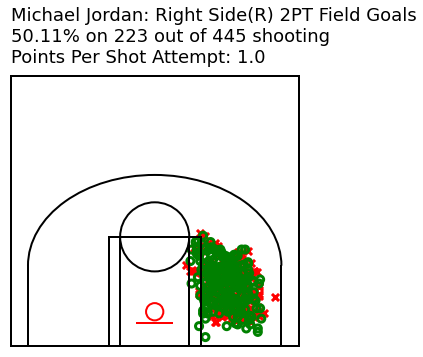

In [20]:
# Michael Jordan - Right Side 2 Pointers
# player = 'Michael Jordan'
shot_type = '2PT Field Goal'
shot_zone_area = 'Right Side(R)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head()

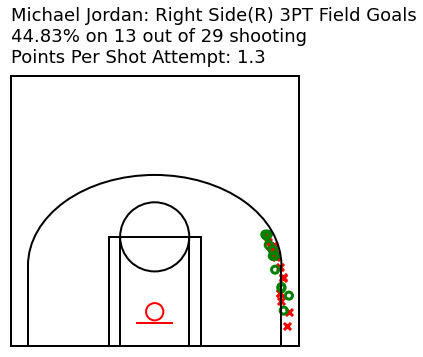

In [21]:
# Michael Jordan - Right Side 3 Pointers
# player = 'Michael Jordan'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Right Side(R)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

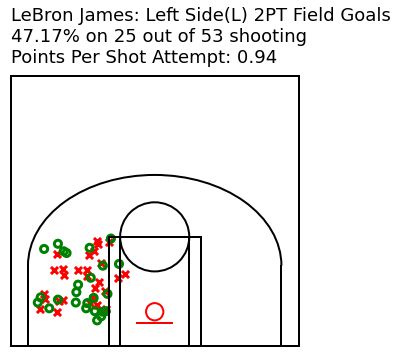

In [22]:
# LeBron James - Left Side 2 Pointers
player = 'LeBron James'
shot_type = '2PT Field Goal'
shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

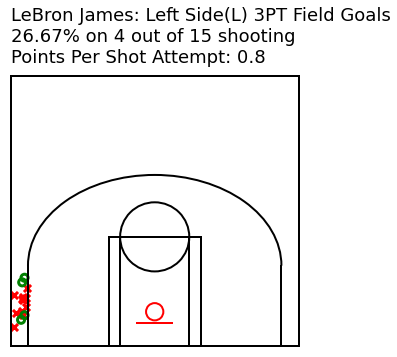

In [23]:
# LeBron James - Left Side 3 Pointers

# player = 'LeBron James'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

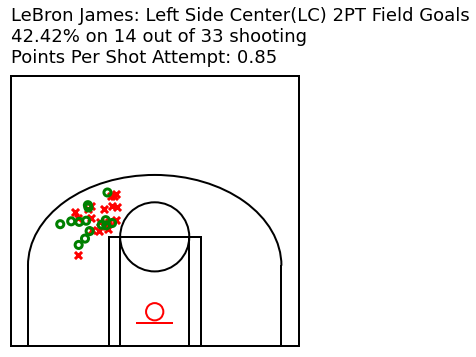

In [24]:
# LeBron James - Left Side Center 2 Pointers

# player = 'LeBron James'
shot_type = '2PT Field Goal'
shot_zone_area = 'Left Side Center(LC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

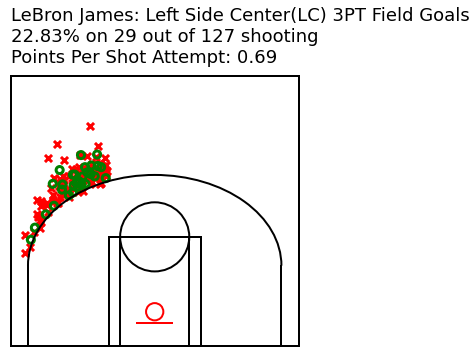

In [25]:
# LeBron James - Left Side Center 3 Pointers
# player = 'LeBron James'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

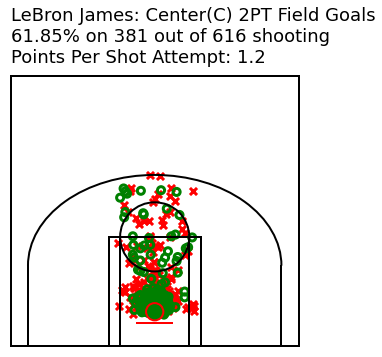

In [26]:
# LeBron James - Center 2 Pointers
# player = 'LeBron James'
shot_type = '2PT Field Goal'
shot_zone_area = 'Center(C)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

# stats_df.loc[len(stats_df)] = the_list
# stats_df.head(20)

C:\Users\ramse\AppData\Local\Temp/ipykernel_19400/2996117947.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &


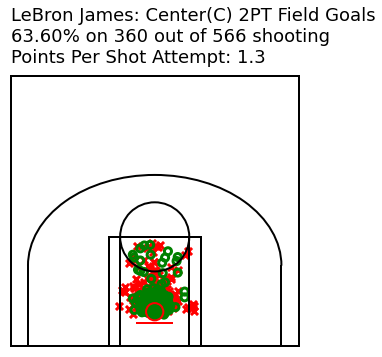

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [27]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
lbj_center_eleven_and_less = df[(df['PLAYER_NAME']=='LeBron James') & (df['SHOT_DISTANCE'] <= 11)]

# player = 'LeBron James'
# shot_type = '2PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(lbj_center_eleven_and_less, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)


C:\Users\ramse\AppData\Local\Temp/ipykernel_19400/2996117947.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_missed_center = data_frame[(data_frame['SHOT_MADE_FLAG'] == 0) & (df['SHOT_ZONE_AREA'] == shot_zone_area) &


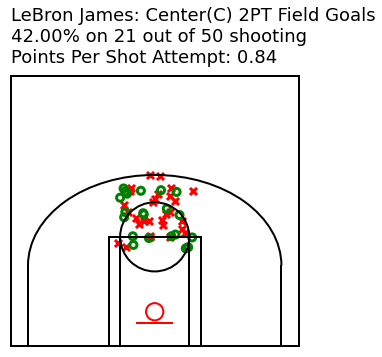

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [28]:
# Let's break up the center into 0-11 and 12+ feet.  To do this, we can use the shot distance column as a filter.
lbj_center_twelve_up = df[(df['PLAYER_NAME']=='LeBron James') & (df['SHOT_DISTANCE'] > 11)]

# player = 'LeBron James'
# shot_type = '2PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(lbj_center_twelve_up, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)

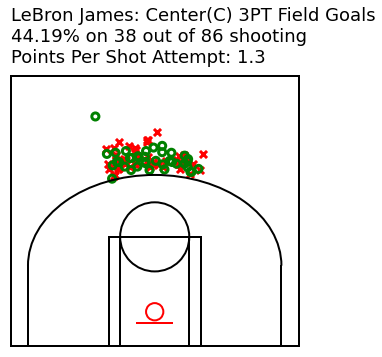

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [29]:
# LeBron James - Center 3 Pointers

# player = 'LeBron James'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)


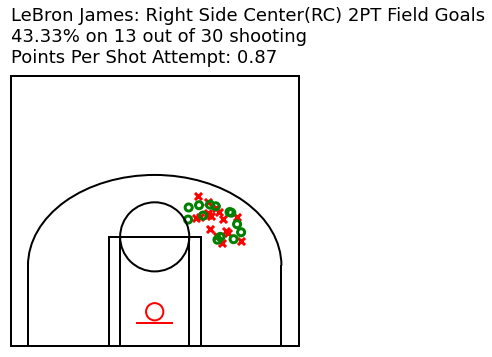

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [30]:
# LeBron James - Right Side Center 2 Pointers

# player = 'LeBron James'
shot_type = '2PT Field Goal'
shot_zone_area = 'Right Side Center(RC)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)

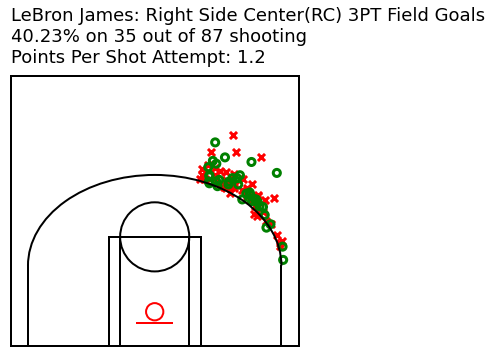

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [31]:
# LeBron James - Right Side Center 3 Pointers

# player = 'LeBron James'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)

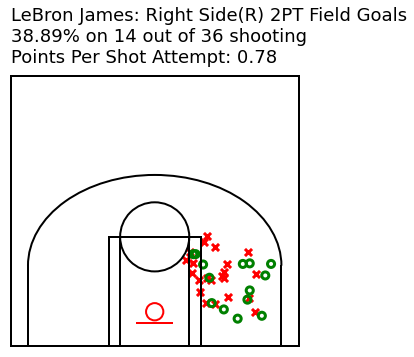

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [32]:
# LeBron James - Right Side 2 Pointers

# player = 'LeBron James'
shot_type = '2PT Field Goal'
shot_zone_area = 'Right Side(R)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)

# create_zone_chart(df, '2PT Field Goal', 'Right Side(R)', 'LeBron James')

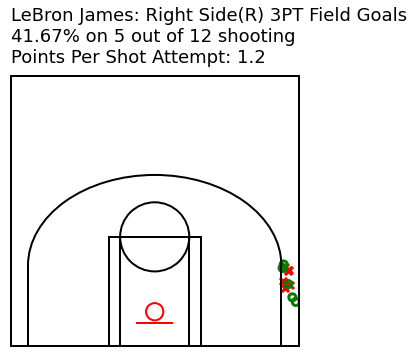

,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOOTING_PERCENTAGE,SHOTS_MADE,SHOTS_ATTEMPTED,POINTS_PER_SHOT_ATTEMPT
0,Michael Jordan,2PT Field Goal,Left Side(L),0.495356,160,323,0.990712
1,Michael Jordan,3PT Field Goal,Left Side(L),0.480000,12,25,1.440000
2,Michael Jordan,2PT Field Goal,Left Side Center(LC),0.518868,55,106,1.037736
3,Michael Jordan,3PT Field Goal,Left Side Center(LC),0.323232,32,99,0.969697
4,Michael Jordan,2PT Field Goal,Center(C),0.516807,246,476,1.033613
5,Michael Jordan,2PT Field Goal,Center(C),0.448529,61,136,0.897059
6,Michael Jordan,3PT Field Goal,Center(C),0.413793,24,58,1.241379
7,Michael Jordan,2PT Field Goal,Right Side Center(RC),0.556522,64,115,1.113043
8,Michael Jordan,3PT Field Goal,Right Side Center(RC),0.375000,30,80,1.125000
9,Michael Jordan,2PT Field Goal,Right Side(R),0.501124,223,445,1.002247


In [33]:
# LeBron James - Right Side 3 Pointers

# player = 'LeBron James'
shot_type = '3PT Field Goal'
# shot_zone_area = 'Left Side(L)'

sp, sm, sa, ppa = create_zone_chart(df, shot_type, shot_zone_area, player)
the_list = [player, shot_type, shot_zone_area, sp, sm, sa, ppa]

stats_df.loc[len(stats_df)] = the_list
stats_df.head(20)

# create_zone_chart(df, '3PT Field Goal', 'Right Side(R)', 'LeBron James')